# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        timestamp = city_weather['dt']
        # Convert date format from Unix to UTC
        utc_date_struct = time.gmtime(timestamp)
        city_date = time.strftime('%m/%d/%Y', utc_date_struct)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | alaghsas
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | puquio
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | brisas de zicatela
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | usinsk
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | mizque
Processing Record 20 of Set 1 | argo
Processing Record 21 of Set 1 | acarau
Processing Record 22 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,66.60,94,75,23.02,PT,05/06/2024
1,qaqortoq,60.7167,-46.0333,30.87,57,4,3.98,GL,05/06/2024
2,ilulissat,69.2167,-51.1000,14.43,64,55,4.23,GL,05/06/2024
3,waitangi,-43.9535,-176.5597,50.83,92,93,1.01,NZ,05/06/2024
4,bethel,41.3712,-73.4140,62.22,88,100,1.90,US,05/06/2024


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,66.60,94,75,23.02,PT,05/06/2024
1,qaqortoq,60.7167,-46.0333,30.87,57,4,3.98,GL,05/06/2024
2,ilulissat,69.2167,-51.1000,14.43,64,55,4.23,GL,05/06/2024
3,waitangi,-43.9535,-176.5597,50.83,92,93,1.01,NZ,05/06/2024
4,bethel,41.3712,-73.4140,62.22,88,100,1.90,US,05/06/2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

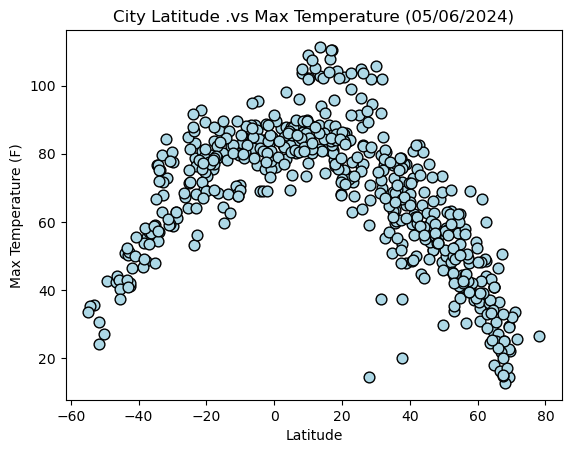

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Max Temp', s=60, color='lightblue', edgecolor='black', 
                  title=("City Latitude .vs Max Temperature (" + city_date + ")"), xlabel="Latitude", 
                  ylabel="Max Temperature (F)"
                 )

# Save the figure
plt.savefig("output_data/Scatter_Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

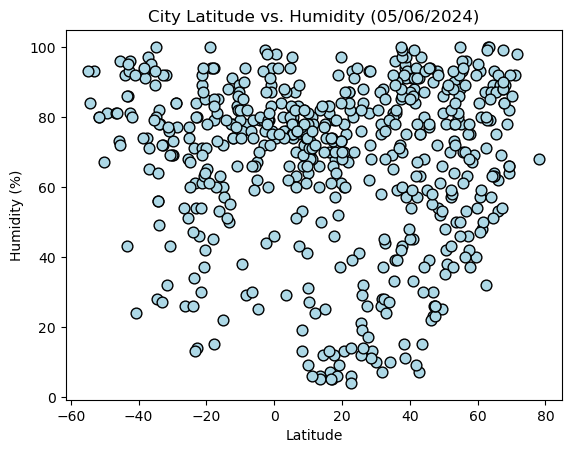

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Humidity', s=60, color='lightblue', edgecolor='black', 
                  title=("City Latitude vs. Humidity (" + city_date + ")"), xlabel="Latitude", 
                  ylabel="Humidity (%)"
                 )

# Save the figure
plt.savefig("output_data/Scatter_Lat_vs_hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

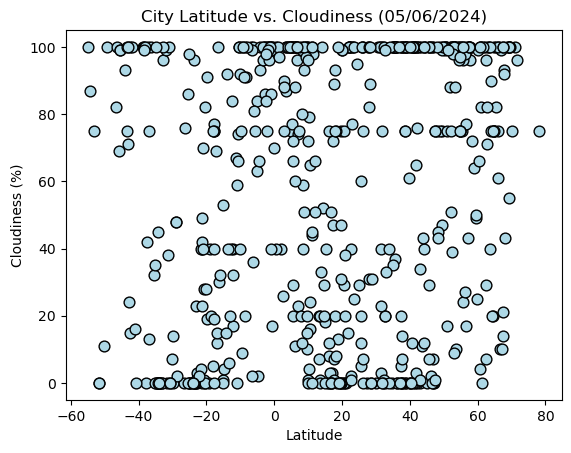

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Cloudiness', s=60, color='lightblue', edgecolor='black', 
                  title=("City Latitude vs. Cloudiness (" + city_date + ")"), xlabel="Latitude", 
                  ylabel="Cloudiness (%)"
                 )

# Save the figure
plt.savefig("output_data/scatter_lat_vs_cld.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

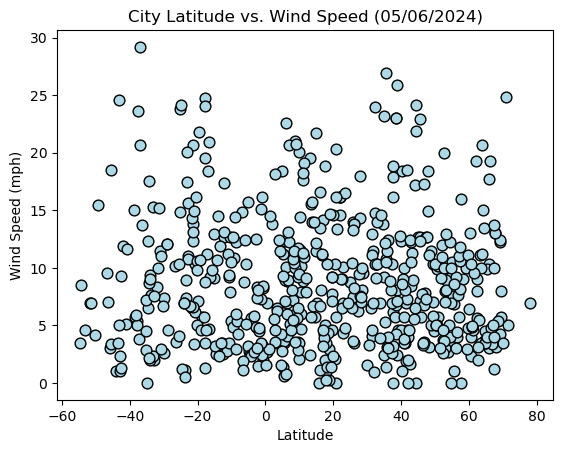

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Wind Speed', s=60, color='lightblue', edgecolor='black', 
                  title=("City Latitude vs. Wind Speed (" + city_date + ")"), xlabel="Latitude", 
                  ylabel="Wind Speed (mph)"
                 )

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def Lin_Reg_Plt(df, x, y):
    x_values = df[x]
    y_values = df[y]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    rvalue = round(rvalue, 3)
    
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, s=60, color='darkcyan', edgecolor='black')
    
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0.5, 0.1), xycoords='axes fraction', fontsize=15,color="red", ha='center', va='bottom')

    plt.xlabel('Latitude')
    plt.ylabel(y)
    print("The r-value is: " + str(rvalue))
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
n_hemi_city_data_df = city_data_df.loc[city_data_df['Lat']  >= 0]

# Display sample data
n_hemi_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,66.60,94,75,23.02,PT,05/06/2024
1,qaqortoq,60.7167,-46.0333,30.87,57,4,3.98,GL,05/06/2024
2,ilulissat,69.2167,-51.1000,14.43,64,55,4.23,GL,05/06/2024
4,bethel,41.3712,-73.4140,62.22,88,100,1.90,US,05/06/2024
7,alaghsas,17.0187,8.0168,110.35,5,3,14.18,NE,05/06/2024


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
s_hemi_city_data_df = city_data_df.loc[city_data_df['Lat']  < 0]

# Display sample data
s_hemi_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,50.83,92,93,1.01,NZ,05/06/2024
5,puerto natales,-51.7236,-72.4875,30.65,80,0,6.91,CL,05/06/2024
6,namibe,-15.1961,12.1522,80.29,60,1,12.95,AO,05/06/2024
8,port-aux-francais,-49.3500,70.2167,42.71,81,100,15.50,TF,05/06/2024
9,puquio,-14.7000,-74.1333,59.56,57,4,2.53,PE,05/06/2024


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.842


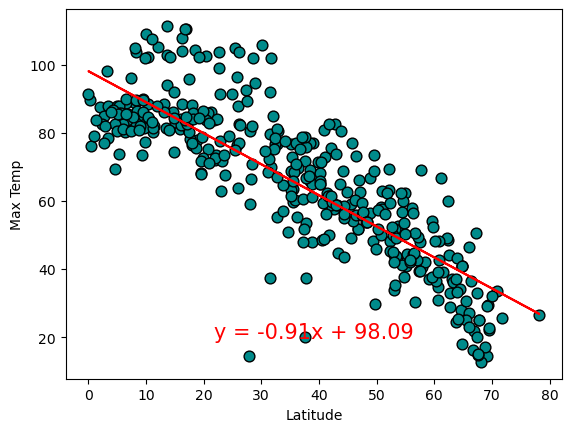

In [82]:
# Linear regression on Northern Hemisphere
Lin_Reg_Plt(n_hemi_city_data_df ,'Lat' ,'Max Temp')

The r-value is: 0.799


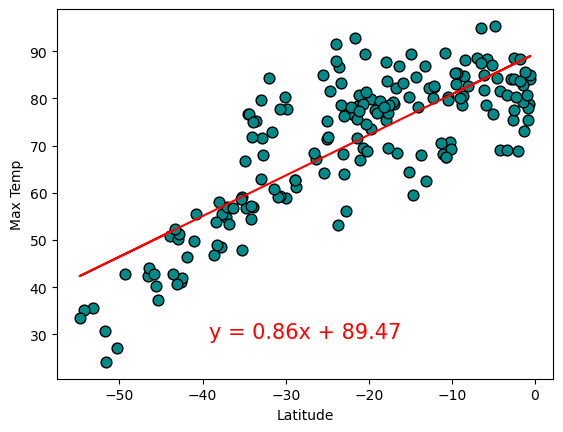

In [83]:
# Linear regression on Southern Hemisphere
Lin_Reg_Plt(s_hemi_city_data_df ,'Lat' ,'Max Temp')

**Discussion about the linear relationship:** The two scatter plots above show the relationship between Latitude and Temperature.  The data points show that Temperature rises as the Latitude gets closer to 0 (equator).  The R-values show quantitatively that there is a high correlation between Temperature and Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.127


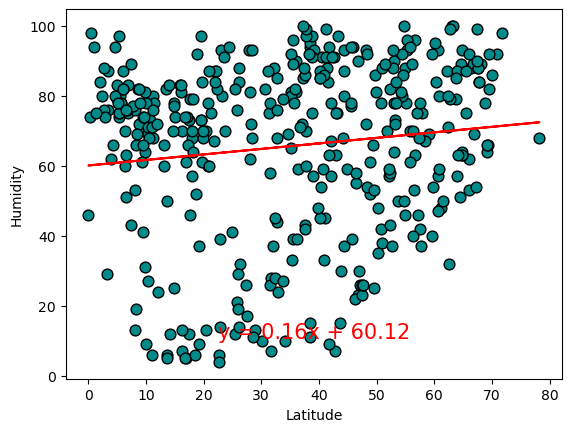

In [84]:
# Northern Hemisphere
Lin_Reg_Plt(n_hemi_city_data_df ,'Lat', 'Humidity')

The r-value is: -0.068


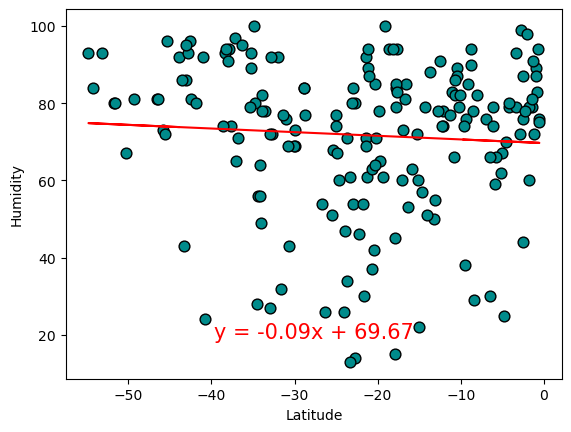

In [85]:
# Southern Hemisphere
Lin_Reg_Plt(s_hemi_city_data_df ,'Lat', 'Humidity')

**Discussion about the linear relationship:** The two scatter plots above show the relationship between Latitude and Humidity. There are more data points for Humidity above 50 than below and looks to be evenly disbursed over the Latitude range.  The R-values show quantitatively that there is no correlation between Humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.154


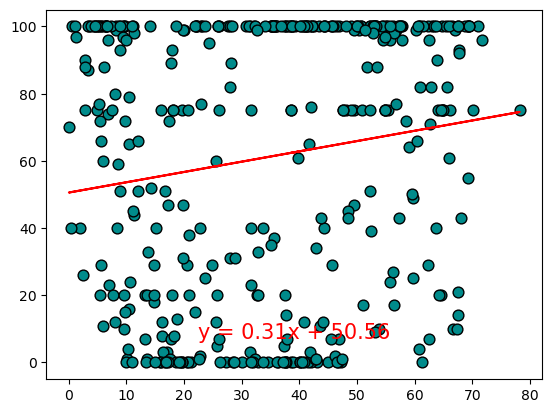

In [75]:
# Northern Hemisphere
Lin_Reg_Plt(n_hemi_city_data_df ,'Lat', 'Cloudiness')

The r-value is: 0.177


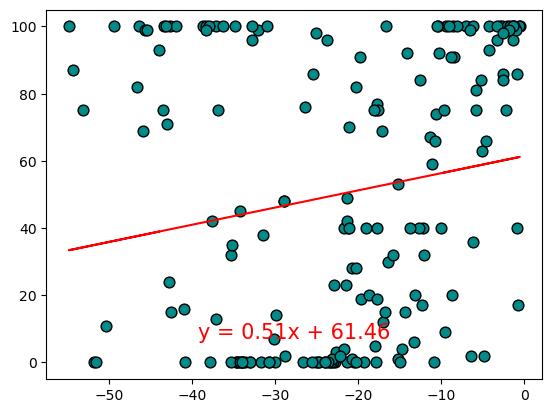

In [76]:
# Southern Hemisphere
Lin_Reg_Plt(s_hemi_city_data_df ,'Lat', 'Cloudiness')

**Discussion about the linear relationship:** The two scatter plots above show the relationship between Latitude and Cloudiness. The highest concentration of Cloudiness data is at 0 and 100 and looks evenly disbursed over the Latitude range.  The R-values show quantitatively that there is a week correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.051


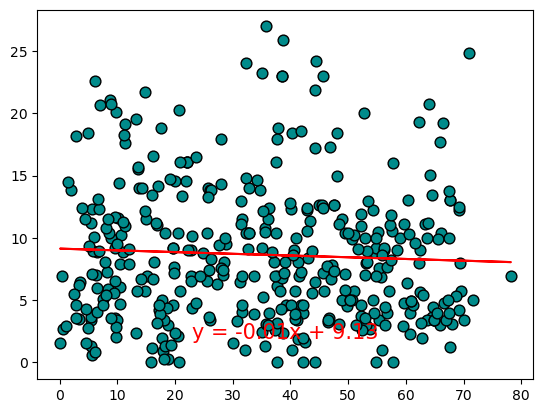

In [77]:
# Northern Hemisphere
Lin_Reg_Plt(n_hemi_city_data_df ,'Lat', 'Wind Speed')

The r-value is: -0.054


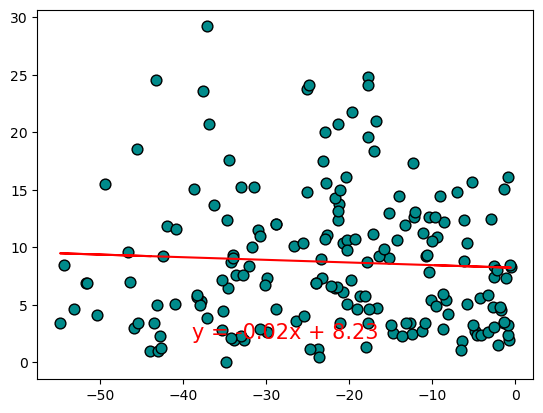

In [78]:
# Southern Hemisphere
Lin_Reg_Plt(s_hemi_city_data_df ,'Lat', 'Wind Speed')

**Discussion about the linear relationship:** The two scatter plots above show the relationship between Wind Speed and Humidity. The volume of data points for Wind Speed decreases above 15 and looks to be evenly disbursed over the Latitude range.  The R-values show quantitatively that there is no correlation between Wind Speed and Latitude.